In [2]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [3]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
dataset = read_csv('housing.csv', delim_whitespace=True, names=names)

In [5]:
dataset.shape

(506, 14)

In [7]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


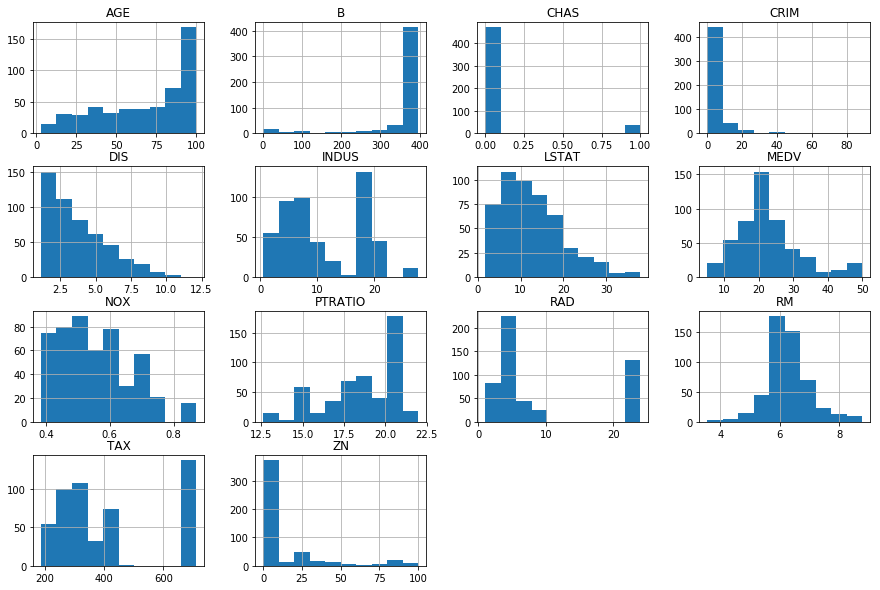

In [31]:
dataset.hist(figsize=(15,10))
pyplot.show()

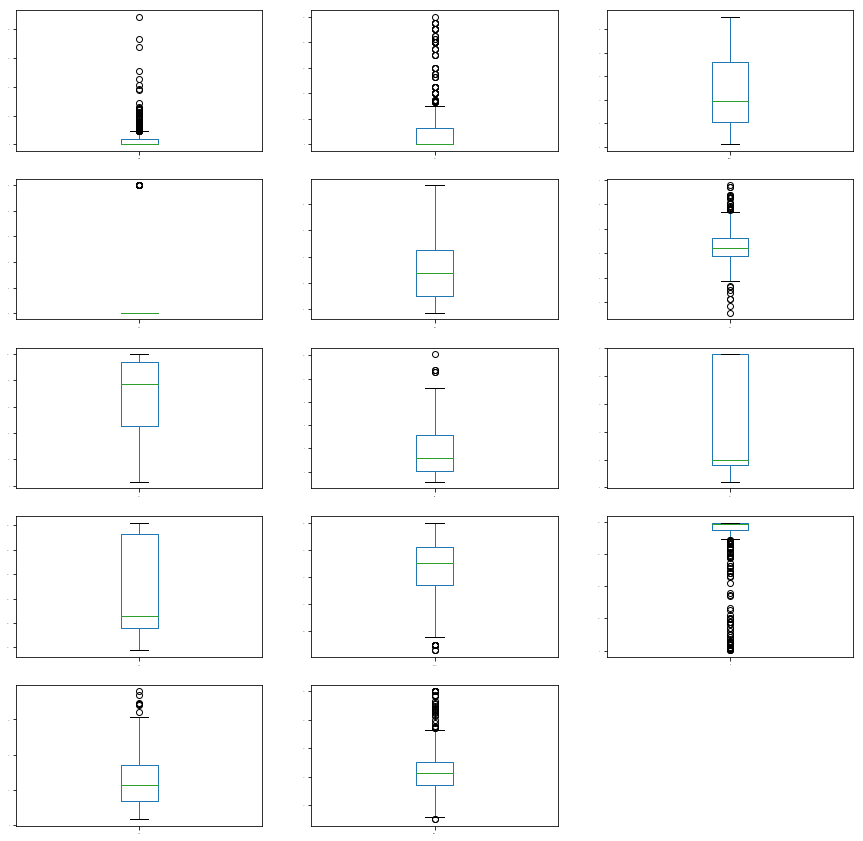

In [34]:
# density
dataset.plot(kind='box', subplots=True, layout=(5,3), figsize=(15,15),sharex=False, legend=False,fontsize=1)
pyplot.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


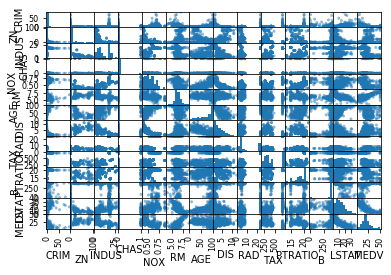

In [35]:
scatter_matrix(dataset)
pyplot.show()

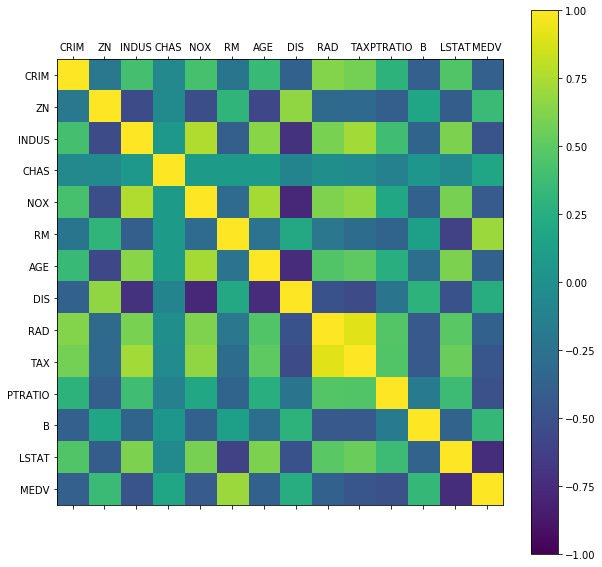

In [37]:
fig = pyplot.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [39]:
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

In [41]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -23.999527 (12.472326)
SVR: -85.518342 (31.994798)


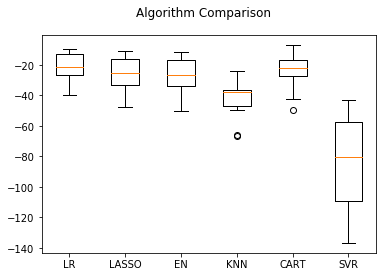

In [42]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [43]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -24.887818 (12.222300)
ScaledSVR: -29.633086 (17.009186)


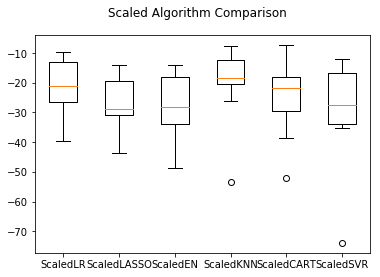

In [44]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [50]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [51]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


In [59]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_test = {'alpha': uniform(),'l1_ratio':uniform()}
model = ElasticNet(max_iter=1000,tol=0.0001)
# kfold = KFold(n_splits=num_folds, random_state=seed)
# grid = GridSearchCV(estimator=model, param_grid=param_test, scoring=scoring, cv=kfold)
# grid_result = grid.fit(rescaledX, Y_train)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_test, n_iter=11,random_state=7,scoring = 'neg_mean_squared_error')
rsearch_result=rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

-34.912101729167304
0.5011204636599379


In [60]:
print("Best: %f using %s" % (grid_result.best_score_, rsearch_result.best_params_))
means = rsearch_result.cv_results_['mean_test_score']
stds = rsearch_result.cv_results_['std_test_score']
params =  rsearch_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.172137 using {'alpha': 0.5011204636599379, 'l1_ratio': 0.07205113335976154}
-51.413147 (36.910601) with: {'alpha': 0.07630828937395717, 'l1_ratio': 0.7799187922401146}
-38.352388 (14.283943) with: {'alpha': 0.4384092314408935, 'l1_ratio': 0.7234651778309412}
-40.413199 (14.595864) with: {'alpha': 0.9779895119966027, 'l1_ratio': 0.5384958704104337}
-34.912102 (11.244536) with: {'alpha': 0.5011204636599379, 'l1_ratio': 0.07205113335976154}
-35.476052 (12.852993) with: {'alpha': 0.26843898010187117, 'l1_ratio': 0.49988250082555996}
-42.191470 (16.319807) with: {'alpha': 0.6792299961209405, 'l1_ratio': 0.8037390361043755}
-35.847541 (12.507631) with: {'alpha': 0.3809411331485384, 'l1_ratio': 0.06593634690590511}
-41.238030 (18.934096) with: {'alpha': 0.28814559930799355, 'l1_ratio': 0.9095935277196137}
-36.008658 (13.969572) with: {'alpha': 0.2133853535799155, 'l1_ratio': 0.4521239618176831}
-35.178498 (11.160477) with: {'alpha': 0.9312060196890217, 'l1_ratio': 0.0248992275503480

In [ ]:
# print("Best: %f using %s" % (rsearch.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [61]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.299092 (6.779008)
ScaledGBM: -10.000633 (4.576741)
ScaledRF: -14.015134 (8.048945)
ScaledET: -11.901121 (6.252051)


In [67]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]),
                 learning_rate=numpy.array([0.01,0.05,0.1,0.2]))
model = GradientBoostingRegressor(random_state=seed,min_samples_leaf=2)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [68]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.159590 using {'learning_rate': 0.1, 'n_estimators': 400}
-42.849727 (13.855726) with: {'learning_rate': 0.01, 'n_estimators': 50}
-25.307436 (8.596161) with: {'learning_rate': 0.01, 'n_estimators': 100}
-17.665374 (6.319282) with: {'learning_rate': 0.01, 'n_estimators': 150}
-14.234649 (5.270787) with: {'learning_rate': 0.01, 'n_estimators': 200}
-12.560924 (4.809059) with: {'learning_rate': 0.01, 'n_estimators': 250}
-11.797915 (4.804494) with: {'learning_rate': 0.01, 'n_estimators': 300}
-11.243218 (4.627936) with: {'learning_rate': 0.01, 'n_estimators': 350}
-10.842431 (4.584798) with: {'learning_rate': 0.01, 'n_estimators': 400}
-12.493932 (4.959759) with: {'learning_rate': 0.05, 'n_estimators': 50}
-10.442345 (4.512345) with: {'learning_rate': 0.05, 'n_estimators': 100}
-9.914237 (4.128273) with: {'learning_rate': 0.05, 'n_estimators': 150}
-9.658211 (3.903795) with: {'learning_rate': 0.05, 'n_estimators': 200}
-9.425525 (3.749625) with: {'learning_rate': 0.05, 'n_estimat

In [69]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400,learning_rate=0.1)
model.fit(rescaledX, Y_train)
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.875252079219903
